# Cripto robot

## importando as bilbliotecas

In [20]:
import yfinance as yf
import pandas as pandas
import matplotlib.pyplot as ptl 
import mplcyberpunk
ptl.style.use("cyberpunk")

## Pegar os dados de cotação do Yahoo Finance

In [21]:
ticker = "BTC-USD"
dados = yf.download(ticker, auto_adjust = False)
dados = dados.droplevel(1, axis = 1)
dados

[*********************100%***********************]  1 of 1 completed


Price           Adj Close          Close           High            Low  \
Date                                                                     
2014-09-17     457.334015     457.334015     468.174011     452.421997   
2014-09-18     424.440002     424.440002     456.859985     413.104004   
2014-09-19     394.795990     394.795990     427.834991     384.532013   
2014-09-20     408.903992     408.903992     423.295990     389.882996   
2014-09-21     398.821014     398.821014     412.425995     393.181000   
...                   ...            ...            ...            ...   
2025-01-29  103703.210938  103703.210938  104750.804688  101283.820312   
2025-01-30  104735.304688  104735.304688  106418.765625  103321.648438   
2025-01-31  102405.023438  102405.023438  106026.351562  101543.882812   
2025-02-01  100655.906250  100655.906250  102755.726562  100297.710938   
2025-02-03   97417.218750   97417.218750   97618.640625   97417.218750   

Price                Open       Volume  
Date                                    
2014-09-17     465.864014     21056800  
2014-09-18     456.859985     34483200  
2014-09-19     424.102997     37919700  
2014-09-20     394.673004     36863600  
2014-09-21     408.084991     26580100  
...                   ...          ...  
2025-01-29  101317.523438  47432049818  
2025-01-30  103709.335938  41915744521  
2025-01-31  104737.562500  45732764360  
2025-02-01  102402.796875  27757944848  
2025-02-03   97618.640625  63489966080  

[3792 rows x 6 columns]

## Preparar e calcular os dados

In [22]:
dados["retorno"] = dados["Close"].pct_change()
dados_retornos_completos = dados["retorno"]
dados["media_maxima"] = dados["High"].rolling(window = 20).mean()
dados["media_minima"] = dados["Low"].rolling(window = 20).mean()
dados.head(50)

Price        Adj Close       Close        High         Low        Open  \
Date                                                                     
2014-09-17  457.334015  457.334015  468.174011  452.421997  465.864014   
2014-09-18  424.440002  424.440002  456.859985  413.104004  456.859985   
2014-09-19  394.795990  394.795990  427.834991  384.532013  424.102997   
2014-09-20  408.903992  408.903992  423.295990  389.882996  394.673004   
2014-09-21  398.821014  398.821014  412.425995  393.181000  408.084991   
2014-09-22  402.152008  402.152008  406.915985  397.130005  399.100006   
2014-09-23  435.790985  435.790985  441.557007  396.196991  402.092010   
2014-09-24  423.204987  423.204987  436.112000  421.131989  435.751007   
2014-09-25  411.574005  411.574005  423.519989  409.467987  423.156006   
2014-09-26  404.424988  404.424988  414.937988  400.009003  411.428986   
2014-09-27  399.519989  399.519989  406.622986  397.372009  403.556000   
2014-09-28  377.181000  377.181000  401.016998  374.332001  399.471008   
2014-09-29  375.467010  375.467010  385.210999  372.239990  376.928009   
2014-09-30  386.944000  386.944000  390.976990  373.442993  376.088013   
2014-10-01  383.614990  383.614990  391.378998  380.779999  387.427002   
2014-10-02  375.071991  375.071991  385.497009  372.946014  383.988007   
2014-10-03  359.511993  359.511993  377.695007  357.859009  375.181000   
2014-10-04  328.865997  328.865997  364.487000  325.885986  359.891998   
2014-10-05  320.510010  320.510010  341.800995  289.295990  328.915985   
2014-10-06  330.079010  330.079010  345.134003  302.559998  320.389008   
2014-10-07  336.187012  336.187012  339.247009  320.481995  330.584015   
2014-10-08  352.940002  352.940002  354.364014  327.187988  336.115997   
2014-10-09  365.026001  365.026001  382.726013  347.687012  352.747986   
2014-10-10  361.562012  361.562012  375.066986  352.963013  364.687012   
2014-10-11  362.299011  362.299011  367.191010  355.950989  361.362000   
2014-10-12  378.549011  378.549011  379.433014  356.144012  362.605988   
2014-10-13  390.414001  390.414001  397.226013  368.897003  377.920990   
2014-10-14  400.869995  400.869995  411.697998  391.324005  391.691986   
2014-10-15  394.773010  394.773010  402.226990  388.765991  400.954987   
2014-10-16  382.556000  382.556000  398.807007  373.070007  394.518005   
2014-10-17  383.757996  383.757996  385.477997  375.389008  382.756012   
2014-10-18  391.441986  391.441986  395.157990  378.971008  383.976013   
2014-10-19  389.545990  389.545990  393.938995  386.457001  391.253998   
2014-10-20  382.845001  382.845001  390.084015  378.252014  389.230988   
2014-10-21  386.475006  386.475006  392.645996  380.834015  382.420990   
2014-10-22  383.157990  383.157990  388.575989  382.248993  386.118011   
2014-10-23  358.416992  358.416992  385.048004  356.446991  382.962006   
2014-10-24  358.345001  358.345001  364.345001  353.304993  358.591003   
2014-10-25  347.270996  347.270996  359.860992  342.877014  358.610992   
2014-10-26  354.704010  354.704010  359.221008  343.931000  347.487000   
2014-10-27  352.989014  352.989014  358.631989  349.808990  354.777008   
2014-10-28  357.618011  357.618011  359.984009  352.678986  353.214996   
2014-10-29  335.591003  335.591003  357.833008  335.342987  357.088989   
2014-10-30  345.304993  345.304993  350.912994  335.071991  335.709015   
2014-10-31  338.321014  338.321014  348.045013  337.141998  345.009003   
2014-11-01  325.748993  325.748993  340.528992  321.054993  338.649994   
2014-11-02  325.891998  325.891998  329.049988  320.626007  326.075012   
2014-11-03  327.553986  327.553986  334.002014  325.480988  325.569000   
2014-11-04  330.492004  330.492004  331.766998  325.076996  327.161011   
2014-11-05  339.485992  339.485992  343.368988  330.683014  330.683014   

Price         Volume   retorno  media_maxima  media_minima  
Date                                                        
2014-09-17  21056800       Na

## Gerar sinais de compra

In [23]:
dados["sinal_compra"] = 0
dados["sinal_compra"] = (dados["Close"] > dados["media_maxima"]).astype(int)
dados.tail(50)

Price           Adj Close          Close           High            Low  \
Date                                                                     
2024-12-15  104298.695312  104298.695312  105047.539062  101227.031250   
2024-12-16  106029.718750  106029.718750  107780.578125  103322.984375   
2024-12-17  106140.601562  106140.601562  108268.445312  105291.734375   
2024-12-18  100041.539062  100041.539062  106470.609375  100041.539062   
2024-12-19   97490.953125   97490.953125  102748.148438   95587.679688   
2024-12-20   97755.929688   97755.929688   98098.914062   92175.179688   
2024-12-21   97224.726562   97224.726562   99507.101562   96426.523438   
2024-12-22   95104.937500   95104.937500   97360.265625   94202.187500   
2024-12-23   94686.242188   94686.242188   96416.210938   92403.132812   
2024-12-24   98676.093750   98676.093750   99404.062500   93448.015625   
2024-12-25   99299.195312   99299.195312   99478.750000   97593.468750   
2024-12-26   95795.515625   95795.515625   99884.570312   95137.882812   
2024-12-27   94164.859375   94164.859375   97294.843750   93310.742188   
2024-12-28   95163.929688   95163.929688   95525.898438   94014.289062   
2024-12-29   93530.226562   93530.226562   95174.875000   92881.789062   
2024-12-30   92643.210938   92643.210938   94903.320312   91317.132812   
2024-12-31   93429.203125   93429.203125   96090.601562   91914.031250   
2025-01-01   94419.757812   94419.757812   94929.867188   92788.125000   
2025-01-02   96886.875000   96886.875000   97739.820312   94201.570312   
2025-01-03   98107.429688   98107.429688   98956.914062   96034.617188   
2025-01-04   98236.226562   98236.226562   98734.429688   97562.976562   
2025-01-05   98314.960938   98314.960938   98813.304688   97291.765625   
2025-01-06  102078.085938  102078.085938  102482.875000   97926.148438   
2025-01-07   96922.703125   96922.703125  102712.484375   96132.875000   
2025-01-08   95043.523438   95043.523438   97258.320312   92525.843750   
2025-01-09   92484.039062   92484.039062   95349.718750   91220.843750   
2025-01-10   94701.453125   94701.453125   95770.609375   92250.093750   
2025-01-11   94566.593750   94566.593750   94977.687500   93840.046875   
2025-01-12   94488.437500   94488.437500   95367.539062   93712.507812   
2025-01-13   94516.523438   94516.523438   95837.000000   89260.101562   
2025-01-14   96534.046875   96534.046875   97352.664062   94322.156250   
2025-01-15  100504.492188  100504.492188  100697.234375   96501.640625   
2025-01-16   99756.906250   99756.906250  100781.585938   97364.445312   
2025-01-17  104462.039062  104462.039062  105884.226562   99948.906250   
2025-01-18  104408.070312  104408.070312  104913.203125  102226.617188   
2025-01-19  101089.609375  101089.609375  106299.796875   99570.531250   
2025-01-20  102016.664062  102016.664062  109114.882812   99471.359375   
2025-01-21  106146.265625  106146.265625  107180.921875  100103.953125   
2025-01-22  103653.070312  103653.070312  106294.343750  103360.265625   
2025-01-23  103960.171875  103960.171875  106820.328125  101257.804688   
2025-01-24  104819.484375  104819.484375  107098.546875  102772.125000   
2025-01-25  104714.648438  104714.648438  105243.789062  104120.375000   
2025-01-26  102682.500000  102682.500000  105438.648438  102507.710938   
2025-01-27  102087.687500  102087.687500  103214.109375   97795.937500   
2025-01-28  101332.476562  101332.476562  103730.820312  100238.187500   
2025-01-29  103703.210938  103703.210938  104750.804688  101283.820312   
2025-01-30  104735.304688  104735.304688  106418.765625  103321.648438   
2025-01-31  102405.023438  102405.023438  106026.351562  101543.882812   
2025-02-01  100655.906250  100655.906250  102755.726562  100297.710938   
2025-02-03   97417.218750   97417.218750   97618.640625   97417.218750   

Price                Open        Volume   retorno   media_maxima  \
Date                                                               
2024-12-15  101

## Gerar Sinais de Venda

In [24]:
dados["sinal_venda"] = 0
dados["sinal_venda"] = (dados["Close"] < dados["media_minima"]).astype(int)
dados.tail(50)

Price           Adj Close          Close           High            Low  \
Date                                                                     
2024-12-15  104298.695312  104298.695312  105047.539062  101227.031250   
2024-12-16  106029.718750  106029.718750  107780.578125  103322.984375   
2024-12-17  106140.601562  106140.601562  108268.445312  105291.734375   
2024-12-18  100041.539062  100041.539062  106470.609375  100041.539062   
2024-12-19   97490.953125   97490.953125  102748.148438   95587.679688   
2024-12-20   97755.929688   97755.929688   98098.914062   92175.179688   
2024-12-21   97224.726562   97224.726562   99507.101562   96426.523438   
2024-12-22   95104.937500   95104.937500   97360.265625   94202.187500   
2024-12-23   94686.242188   94686.242188   96416.210938   92403.132812   
2024-12-24   98676.093750   98676.093750   99404.062500   93448.015625   
2024-12-25   99299.195312   99299.195312   99478.750000   97593.468750   
2024-12-26   95795.515625   95795.515625   99884.570312   95137.882812   
2024-12-27   94164.859375   94164.859375   97294.843750   93310.742188   
2024-12-28   95163.929688   95163.929688   95525.898438   94014.289062   
2024-12-29   93530.226562   93530.226562   95174.875000   92881.789062   
2024-12-30   92643.210938   92643.210938   94903.320312   91317.132812   
2024-12-31   93429.203125   93429.203125   96090.601562   91914.031250   
2025-01-01   94419.757812   94419.757812   94929.867188   92788.125000   
2025-01-02   96886.875000   96886.875000   97739.820312   94201.570312   
2025-01-03   98107.429688   98107.429688   98956.914062   96034.617188   
2025-01-04   98236.226562   98236.226562   98734.429688   97562.976562   
2025-01-05   98314.960938   98314.960938   98813.304688   97291.765625   
2025-01-06  102078.085938  102078.085938  102482.875000   97926.148438   
2025-01-07   96922.703125   96922.703125  102712.484375   96132.875000   
2025-01-08   95043.523438   95043.523438   97258.320312   92525.843750   
2025-01-09   92484.039062   92484.039062   95349.718750   91220.843750   
2025-01-10   94701.453125   94701.453125   95770.609375   92250.093750   
2025-01-11   94566.593750   94566.593750   94977.687500   93840.046875   
2025-01-12   94488.437500   94488.437500   95367.539062   93712.507812   
2025-01-13   94516.523438   94516.523438   95837.000000   89260.101562   
2025-01-14   96534.046875   96534.046875   97352.664062   94322.156250   
2025-01-15  100504.492188  100504.492188  100697.234375   96501.640625   
2025-01-16   99756.906250   99756.906250  100781.585938   97364.445312   
2025-01-17  104462.039062  104462.039062  105884.226562   99948.906250   
2025-01-18  104408.070312  104408.070312  104913.203125  102226.617188   
2025-01-19  101089.609375  101089.609375  106299.796875   99570.531250   
2025-01-20  102016.664062  102016.664062  109114.882812   99471.359375   
2025-01-21  106146.265625  106146.265625  107180.921875  100103.953125   
2025-01-22  103653.070312  103653.070312  106294.343750  103360.265625   
2025-01-23  103960.171875  103960.171875  106820.328125  101257.804688   
2025-01-24  104819.484375  104819.484375  107098.546875  102772.125000   
2025-01-25  104714.648438  104714.648438  105243.789062  104120.375000   
2025-01-26  102682.500000  102682.500000  105438.648438  102507.710938   
2025-01-27  102087.687500  102087.687500  103214.109375   97795.937500   
2025-01-28  101332.476562  101332.476562  103730.820312  100238.187500   
2025-01-29  103703.210938  103703.210938  104750.804688  101283.820312   
2025-01-30  104735.304688  104735.304688  106418.765625  103321.648438   
2025-01-31  102405.023438  102405.023438  106026.351562  101543.882812   
2025-02-01  100655.906250  100655.906250  102755.726562  100297.710938   
2025-02-03   97417.218750   97417.218750   97618.640625   97417.218750   

Price                Open        Volume   retorno   media_maxima  \
Date                                                               
2024-12-15  101

## Operações

In [27]:
dados["posicao"] = 0
for i in range(1, len(dados)):
    if dados["sinal_compra"].iloc[i] == 1:
        dados["posicao"].iloc[i] = 1
    elif dados["sinal_venda"].iloc[i] == 1:
        dados["posicao"].iloc[i] = 0
    else:
        if (dados["posicao"].iloc[i - 1] == 1) and (dados["sinal_venda"].iloc[i] == 0):
            dados["posicao"].iloc[i] = 1
        else:
            dados["posicao"].iloc[i] = 0

dados["posicao"] = dados["posicao"].shift()



C:\Users\Fabio\AppData\Local\Temp\ipykernel_30740\812151345.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dados["posicao"].iloc[i] = 0
C:\Users\Fabio\AppData\Local\Temp\ipykernel_30740\812151345.py:11: SettingWithCopyWarning: 
A value

## Criar um ID para todos os trades históricos na tabela

In [29]:
dados["trades"] = (dados["posicao"] != dados["posicao"].shift()).cumsum()
dados["trades"] = dados["trades"].where(dados["posicao"] == 1)
dados = dados.dropna(subset = "trades")
dados.tail(20)

Price           Adj Close          Close           High            Low  \
Date                                                                     
2025-01-08   95043.523438   95043.523438   97258.320312   92525.843750   
2025-01-09   92484.039062   92484.039062   95349.718750   91220.843750   
2025-01-16   99756.906250   99756.906250  100781.585938   97364.445312   
2025-01-17  104462.039062  104462.039062  105884.226562   99948.906250   
2025-01-18  104408.070312  104408.070312  104913.203125  102226.617188   
2025-01-19  101089.609375  101089.609375  106299.796875   99570.531250   
2025-01-20  102016.664062  102016.664062  109114.882812   99471.359375   
2025-01-21  106146.265625  106146.265625  107180.921875  100103.953125   
2025-01-22  103653.070312  103653.070312  106294.343750  103360.265625   
2025-01-23  103960.171875  103960.171875  106820.328125  101257.804688   
2025-01-24  104819.484375  104819.484375  107098.546875  102772.125000   
2025-01-25  104714.648438  104714.648438  105243.789062  104120.375000   
2025-01-26  102682.500000  102682.500000  105438.648438  102507.710938   
2025-01-27  102087.687500  102087.687500  103214.109375   97795.937500   
2025-01-28  101332.476562  101332.476562  103730.820312  100238.187500   
2025-01-29  103703.210938  103703.210938  104750.804688  101283.820312   
2025-01-30  104735.304688  104735.304688  106418.765625  103321.648438   
2025-01-31  102405.023438  102405.023438  106026.351562  101543.882812   
2025-02-01  100655.906250  100655.906250  102755.726562  100297.710938   
2025-02-03   97417.218750   97417.218750   97618.640625   97417.218750   

Price                Open        Volume   retorno   media_maxima  \
Date                                                               
2025-01-08   96924.164062   63875859171 -0.019388   98038.371484   
2025-01-09   95043.484375   62777261693 -0.026930   97900.911719   
2025-01-16  100505.296875   54103781805 -0.007438   97472.837500   
2025-01-17  100025.765625   71888972663  0.047166   97990.753906   
2025-01-18  104124.953125   50445655726 -0.000517   98477.670313   
2025-01-19  104411.289062   76789928525 -0.031784   99047.494141   
2025-01-20  101083.750000  126279678351  0.009171   99698.708203   
2025-01-21  102052.578125   88733878242  0.040480  100311.260938   
2025-01-22  106136.382812   53878181052 -0.023488  100738.987109   
2025-01-23  103657.671875  104104515428  0.002963  101132.157812   
2025-01-24  103965.671875   52388229265  0.008266  101550.363672   
2025-01-25  104824.031250   23888996502 -0.001000  101871.887891   
2025-01-26  104713.210938   22543395879 -0.019407  102019.676562   
2025-01-27  102680.304688   89006608428 -0.005793  102044.757812   
2025-01-28  102095.414062   47180685494 -0.007398  102368.382812   
2025-01-29  101317.523438   47432049818  0.023396  102838.437109   
2025-01-30  103709.335938   41915744521  0.009952  103370.844922   
2025-01-31  104737.562500   45732764360 -0.022249  103923.278125   
2025-02-01  102402.796875   27757944848 -0.017080  104292.687500   
2025-02-03   97618.640625   63489966080 -0.032176  104381.769531   

Price        media_minima  sinal_compra  sinal_venda  posicao  trades  
Date                                                                   
2025-01-08   94464.414844             0            0      1.0   175.0  
2025-01-09   94416.698047             0            1      1.0   175.0  
2025-01-16   94153.150000             1            0      1.0   177.0  
2025-01-17   94449.880859             1            0      1.0   177.0  
2025-01-18   94917.122266             1            0      1.0   177.0  
2025-01-19   95329.792188             1            0      1.0   177.0  
2025-01-20   95707.658594             1            0      1.0   177.0  
2025-01-21   96073.450000             1            0      1.0   177.0  
2025-01-22   96531.384766             1            0      1.0   177.0  
2025-01-23   96792.544141             1            0      1.0   177.0  
2025-01-24

## Calcular retornos de todos os trades

In [31]:
df_retorno_acumulado = (1 + dados["retorno"]).cumprod() - 1
df_retorno_acumulado

Date
2014-10-14      0.026782
2014-10-15      0.011165
2014-10-16     -0.020127
2014-10-17     -0.017049
2014-10-18      0.002633
                 ...    
2025-01-29    341.647958
2025-01-30    345.058121
2025-01-31    337.358590
2025-02-01    331.579295
2025-02-03    320.878279
Name: retorno, Length: 2138, dtype: float64

In [32]:
dados_retorno_btc = (1 + dados_retornos_completos).cumprod() - 1
dados_retorno_btc

Date
2014-09-17           NaN
2014-09-18     -0.071926
2014-09-19     -0.136745
2014-09-20     -0.105896
2014-09-21     -0.127944
                 ...    
2025-01-29    225.755954
2025-01-30    228.012716
2025-01-31    222.917356
2025-02-01    219.092761
2025-02-03    212.011094
Name: retorno, Length: 3792, dtype: float64

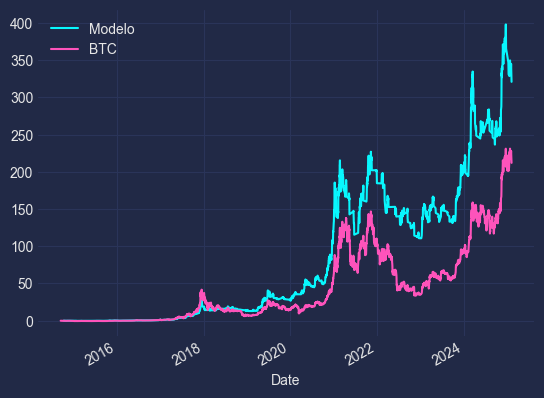

In [33]:
df_retorno_acumulado.plot(label = "Modelo")
dados_retorno_btc.plot(label = "BTC")
ptl.legend()
ptl.show()